<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [186]:
movies = pd.read_csv('/Users/CSSBU/Desktop/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [6]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [7]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [27]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [30]:
# Answer:
movies.sort_values(by='duration', ascending=False)
shortest_movie = movies['title'][0]
longest_movie = movies['title'][movies['title'].count()-1]
print("Shortest movie is: " + shortest_movie)
print("Longest movie is: " + longest_movie)

Shortest movie is: The Shawshank Redemption
Longest movie is: Wall Street


#### Create a histogram of duration, choosing an "appropriate" number of bins.

Text(0.5, 0, 'Duration')

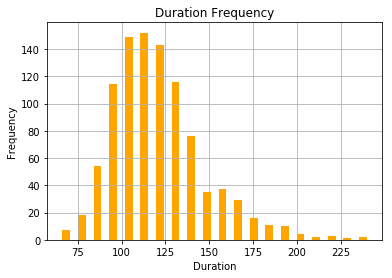

In [36]:
# Answer:
movies.duration.plot.hist(grid=True, bins=20, rwidth=0.5,
                   color='orange')
plt.title('Duration Frequency')
plt.xlabel('Duration')

#### Use a box plot to display that same data.

{'whiskers': [<matplotlib.lines.Line2D at 0x12b790ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x12b7935c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12b790b38>],
 'medians': [<matplotlib.lines.Line2D at 0x12b793c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x12b793f98>],
 'means': []}

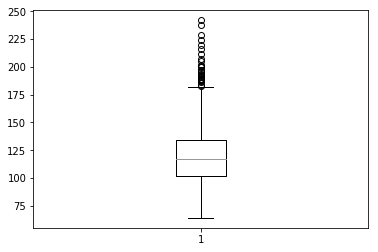

In [59]:
# Answer:
plt.boxplot(movies['duration'])

## Intermediate level

#### Count how many movies have each of the content ratings.

In [71]:
# Answer:
movies.groupby('content_rating')['title'].count()

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
Name: title, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Frequency')

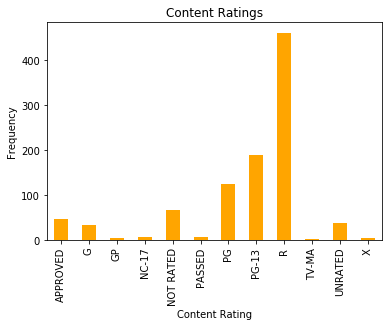

In [82]:
# Answer:
movies.groupby('content_rating')['title'].count().plot(kind='bar',color='orange', title='Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Frequency')



#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [197]:
# Answer:
movies['content_rating'].replace("NOT RATED" , "UNRATED",inplace=False)
movies['content_rating'].replace("APPROVED" , "UNRATED",inplace=False)
movies['content_rating'].replace("PASSED" , "UNRATED",inplace=False)
movies['content_rating'].replace("GP" , "UNRATED",inplace=False)


0              R
1              R
2              R
3          PG-13
4              R
5      NOT RATED
6      NOT RATED
7          PG-13
8              R
9              R
10         PG-13
11         PG-13
12            PG
13         PG-13
14         PG-13
15         PG-13
16             R
17       UNRATED
18             R
19            PG
20             R
21             R
22      APPROVED
23             R
24             R
25         PG-13
26         PG-13
27             R
28             R
29        PASSED
         ...    
949           PG
950            R
951            R
952            R
953           PG
954        PG-13
955            R
956           PG
957            R
958        PG-13
959            R
960        PG-13
961            R
962           PG
963            R
964        PG-13
965        PG-13
966        PG-13
967            R
968            R
969            R
970            R
971            R
972        NC-17
973        PG-13
974           PG
975           PG
976        PG-

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [198]:
# Answer:
movies['content_rating'].replace("X","NC-17",inplace=False)
movies['content_rating'].replace("TV-MA","NC-17",inplace=False)


0              R
1              R
2              R
3          PG-13
4              R
5      NOT RATED
6      NOT RATED
7          PG-13
8              R
9              R
10         PG-13
11         PG-13
12            PG
13         PG-13
14         PG-13
15         PG-13
16             R
17       UNRATED
18             R
19            PG
20             R
21             R
22      APPROVED
23             R
24             R
25         PG-13
26         PG-13
27             R
28             R
29        PASSED
         ...    
949           PG
950            R
951            R
952            R
953           PG
954        PG-13
955            R
956           PG
957            R
958        PG-13
959            R
960        PG-13
961            R
962           PG
963            R
964        PG-13
965        PG-13
966        PG-13
967            R
968            R
969            R
970            R
971            R
972        NC-17
973        PG-13
974           PG
975           PG
976        PG-

#### Count the number of missing values in each column.

In [199]:
# Answer:

movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [200]:
# Answer:

print(movies[movies.isnull().any(axis=1)].head())
movies.fillna("Unrated",inplace=True)
movies.isnull().sum()

     star_rating                               title content_rating  \
187          8.2  Butch Cassidy and the Sundance Kid            NaN   
649          7.7                   Where Eagles Dare            NaN   
936          7.4                           True Grit            NaN   

         genre  duration                                        actors_list  
187  Biography       110  [u'Paul Newman', u'Robert Redford', u'Katharin...  
649     Action       158  [u'Richard Burton', u'Clint Eastwood', u'Mary ...  
936  Adventure       128    [u'John Wayne', u'Kim Darby', u'Glen Campbell']  


star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [201]:
# Answer:
long = movies['duration'] > 159
short = movies['duration']< 160

long_rating = movies[long]['star_rating'].mean()
short_rating = movies[short]['star_rating'].mean()

print('Long movies have star rating average of: ' , long_rating)
print('Short movies have star rating average of: ' , short_rating)

Long movies have star rating average of:  8.128235294117651
Short movies have star rating average of:  7.867114093959758


#### Use a visualization to detect whether there is a relationship between duration and star rating.

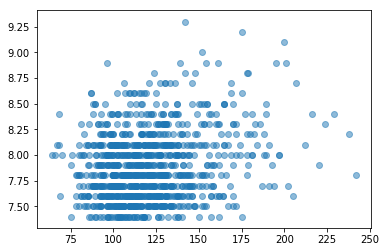

In [202]:
# Answer:
plt.scatter(movies['duration'], movies['star_rating'],alpha=0.5)


#### Calculate the average duration for each genre.

In [203]:
# Answer:
movies.groupby(['genre'])['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

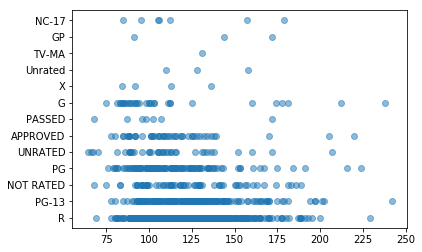

In [204]:
# Answer:
plt.scatter( movies['duration'],movies['content_rating'],alpha=0.5)



#### Determine the top rated movie (by star rating) for each genre.

In [221]:
# Answer:
movies.groupby('genre')['star_rating'].max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [247]:
# Answer:
movies[movies['title'].duplicated() == True]


,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,Unrated,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [248]:
#different movies
movies[movies['title'] == 'The Girl with the Dragon Tattoo']


,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."


In [249]:
#different movies
movies[movies['title'] == 'Dracula']

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."


In [250]:
movies[movies['title'] == 'Les Miserables']

,star_rating,title,content_rating,genre,duration,actors_list
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."


In [251]:
movies[movies['title'] == 'True Grit']

,star_rating,title,content_rating,genre,duration,actors_list
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,Unrated,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [260]:
# Answer:



#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [291]:
# Answer:

genre_list = movies.genre.value_counts() > 10
genres = []


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:


#### Option 4: aggregate by count and mean, then filter using the count

In [305]:
# Answer:

averages=movies.groupby(['genre'])['star_rating'].mean()
genre_list = movies.genre.value_counts() > 10


## Bonus

#### Figure out something "interesting" using the actors data!